In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## load the dataset 

In [29]:
data = pd.read_csv('Salaries.csv')
data.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


## show statistics

In [30]:
data.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


## visualize the statistics

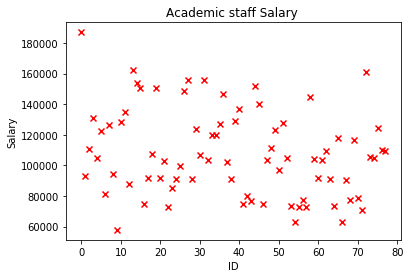

In [31]:
x = data.index.values
y = data.salary.values
plt.scatter(x,y,marker='x',c='r')
plt.xlabel('ID')
plt.ylabel('Salary')
plt.title('Academic staff Salary ')
plt.show()

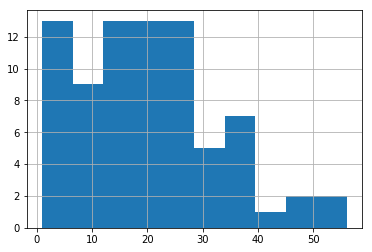

In [32]:
data.phd.hist();

## preprocessing

In [33]:
string_df_names = list(data.select_dtypes(include='object').columns.values)
encoder = {}
for str_col_name in string_df_names:
    encoder[str_col_name] = LabelEncoder()
    data[str_col_name] = encoder[str_col_name].fit_transform(data[str_col_name])

In [34]:
encoder['rank'].classes_

array(['AssocProf', 'AsstProf', 'Prof'], dtype=object)

## split hte data

In [35]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## train the model usig KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [38]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [39]:
y_pred = knn.predict(x_test)

## compute the accuracy

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
R2 = r2_score(y_test,y_pred)
print("R2 = ",R2)
mse = mean_squared_error(y_test,y_pred)
print("MSE = ",mse)

R2 =  -0.11012454834797025
MSE =  680400371.5499998
